In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def secant(f, x0):
    flag = 1
    h = 0.01
    x1 = x0
    f1 = f(x1)
    x2 = x1 + x1*h
    f2 = f(x2)
    for i in range(1000):
        x = x2 - f2*(x2-x1)/(f2-f1)
        if abs(x-x2)<0.001:
            flag = 0
            break
        x1 = x2
        if(x<0):
            x = 0.1
        x2 = x
        f1 = f(x1)
        f2 = f(x2)
    if abs(flag-1)<0.001:
        print('No Convergence')
        x = 0
    return x

In [3]:
data = pd.read_csv('nuclear_data.csv')
data['a'] = data['n']+data['z']
data['be/a(keV)'] = data['bindingEnergy(keV)']
data['be(MeV)'] = data['be/a(keV)']*data['a']*(10**(-3))
data.drop('bindingEnergy(keV)',axis = 1,inplace = True)
data = data[(data.a%2!=0)]

A = data['a']
N = data['n']
Z = data['z']
y = data['be(MeV)']

In [4]:
a11 = (-A**2).sum() 
a12 = (A**(5/3)).sum() 
a13 = ((Z**2)*(A**(2/3))).sum() 
a14 = (((N-Z)**2)/2).sum() 
a21 = (-A**(5/3)).sum() 
a22 = (A**(4/3)).sum() 
a23 = ((Z**2)*(A**(1/3))).sum() 
a24 = (((N-Z)**2)/(2*(A**(1/3)))).sum() 
a31 = (-(Z**2)*(A**(2/3))).sum() 
a32 = ((Z**2)*(A**(1/3))).sum() 
a33 = ((Z**4)/(A**(2/3))).sum() 
a34 = ((Z**2)*((N-Z)**2)/(2*(A**(4/3)))).sum() 
a41 = (-((N-Z)**2)).sum() 
a42 = (((N-Z)**2)/(A**(1/3))).sum() 
a43 = ((Z**2)*((N-Z)**2)/(A**(4/3))).sum() 
a44 = (((N-Z)**4)/(2*(A**2))).sum() 

b1 = (-y*A).sum()
b2 = (-y*(A**(2/3))).sum()
b3 = (-y*(Z**2)/(A**(1/3))).sum()
b4 = (-y*((N-Z)**2)/A).sum()

arr1 = np.array([[a11, a12, a13, a14], [a21, a22, a23, a24], [a31, a32, a33, a34], [a41, a42, a43, a44]])
arr2 = np.array([b1, b2, b3, b4])
[av, ass, ac, asym] = np.linalg.solve(arr1, arr2)
print(av, ass, ac, asym)

15.170737926298017 15.656162687069349 0.6830801465619543 44.37887392399462


In [5]:
av = 15.8
ass = 18.3
ac = 0.714
asym = 2*23.2
Mn = 939.565420
Mh = 938.272088
N_list = range(1,201)
Zproton = []
Zbeta = []
Zneutron = []
for N in N_list:
    def f(Z):
        A = N+Z
        return N-Z-(ac*(A**(2/3))-(Mn-Mh))/(2*asym/A+ac/(A**(1/3)))
    Zbeta.append(int(secant(f,N)))
    def g(Z):
        A = N+Z
        beta = 2*ac*(A**(2/3))/(ac*(A**(2/3))+6*asym)
        gamma = (av+3*asym/2-2*ass*(A**(-1/3))/3)/(ac*(A**(2/3))/3+2*asym)
        return Z**2-2*Z*A*(1+beta)+gamma*(A**2)
    Zproton.append(int(secant(g,N)))
    def h(Z):
        A = N+Z
        alpha = (av+3*asym/2-2*ass/(3*(A**(1/3)))+ac*(A**(2/3))/3)/(ac*(A**(2/3))/3+2*asym)
        return N**2-2*N*A+alpha*(A**2)
    Zneutron.append(int(secant(h,N)))

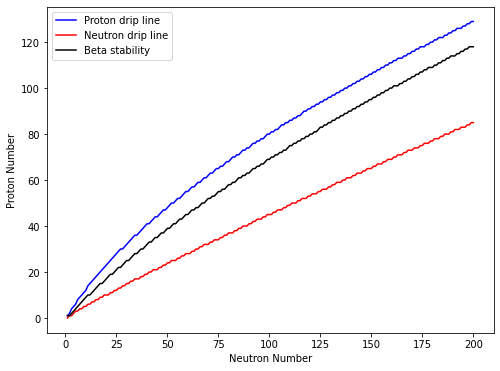

In [6]:
plt.figure(figsize=(8,6))
plt.plot(N_list,Zproton,label='Proton drip line',color='b')
plt.plot(N_list,Zneutron,label='Neutron drip line',color='r')
plt.plot(N_list,Zbeta,label='Beta stability',color='k')
plt.xlabel('Neutron Number')
plt.ylabel('Proton Number')
plt.legend()
plt.show()